# 7. Evaluation and results comparison

Evaluating stored metrics for different experiments


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import math

from IPython.display import Image

from matplotlib import pyplot as plt
from matplotlib import patches

from metrics import save_metrics
from metrics import plot_metrics
from metrics import init_metrics_file

from models import evaluate_model


from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
import time
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV


sns.set()

---

In [2]:
#init_metrics_file()

### Define methods to plot metrics

In [3]:
def plot_classifier(df_data_to_plot, classifier):

    plt.figure(figsize=(20,5))
    x = range(0, df_data_to_plot.shape[1])
    _x = np.arange(len(x))
    labels = df_data_to_plot.columns
    plt.xticks(x, labels, rotation='vertical');
    
    plt.bar(_x + 0, height=df_data_to_plot.loc[(classifier, 'accuracy')], width=.1, label='accuracy')
    plt.bar(_x + .1, height=df_data_to_plot.loc[(classifier, 'f1-score')], width=.1, label='f1-score')
    plt.bar(_x + .2, height=df_data_to_plot.loc[(classifier, 'auc-roc')], width=.1, label='auc-roc')
    plt.bar(_x + .3, height=df_data_to_plot.loc[(classifier, 'precision')], width=.1, label='precision')
    plt.bar(_x + .4, height=df_data_to_plot.loc[(classifier, 'recall')], width=.1, label='recall')
    
    plt.xticks(rotation=90);
    plt.title(f'Metrics comparison for classifier {classifier}');
    plt.legend();
    
    
def plot_metric(df_data_to_plot, classifiers, metric):
    plt.figure(figsize=(20,5))
    x = range(0, df.shape[1])
    _x = np.arange(len(x))
    labels = df.columns
    plt.xticks(x, labels, rotation='vertical');
    width = 0
    for classifier in classifiers:
        plt.bar(_x + width, height=df_data_to_plot.loc[(classifier, metric)], width=.1, label=classifier)
        width = width + .1 
        
    plt.xticks(rotation=90);
    plt.title(f'Metric {metric} comparison for multiple classifiers');
    plt.legend();    
    
   

---
### Read metrics from a file 

In [4]:
df = plot_metrics()
df = df.replace(to_replace='-', value=0).astype(float)
cols = ['first_dataset', 'balanced', 'with_distance', 'with_angle', 'with_player_ids', 'with_player_stats', 'with_player_stats_tuned', 'with_player_salary', 'short_dist', 'long_dist']
df = df[cols]
cols_top = [ 'balanced', 'with_distance', 'with_angle', 'with_player_stats', 'with_player_stats_tuned']
df_top = df[cols_top].copy()
df

first_dataset  balanced  with_distance  with_angle  \
Classifier Metric                                                          
LogReg     accuracy        0.906962  0.629021       0.678558    0.678874   
           f1-score        0.000000  0.645525       0.695976    0.686312   
           auc-roc         0.667995  0.667198       0.730253    0.730613   
           precision       0.000000  0.616519       0.661947    0.672773   
           recall          0.000000  0.677394       0.733693    0.700407   
LGBM       accuracy        0.907557  0.690276       0.690410    0.689127   
           f1-score        0.024579  0.702758       0.705681    0.704734   
           auc-roc         0.750437  0.752104       0.749010    0.745729   
           precision       0.671679  0.673868       0.674303    0.672938   
           recall          0.012519  0.734236       0.740121    0.739684   
KNC        accuracy        0.906962  0.674741       0.671328    0.673178   
           f1-score        0.000000  0.694106       0.693393    0.687854   
           auc-roc         0.718996  0.726646       0.722534    0.724939   
           precision       0.000000  0.653549       0.651446    0.660169   
           recall          0.000000  0.740028       0.741114    0.717963   

                      with_player_ids  with_player_stats  \
Classifier Metric                                          
LogReg     accuracy          0.514347           0.551610   
           f1-score          0.061548           0.495406   
           auc-roc           0.522430           0.587033   
           precision         0.998512           0.568678   
           recall            0.031753           0.438860   
LGBM       accuracy          0.695797           0.697363   
           f1-score          0.709648           0.711887   
           auc-roc           0.754982           0.759526   
           precision         0.680674           0.681211   
           recall            0.741198           0.745457   
KNC        accuracy          0.529395           0.560938   
           f1-score          0.491381           0.569601   
           auc-roc           0.545610           0.585872   
           precision         0.536523           0.560254   
           recall            0.453246           0.579264   

                      with_player_stats_tuned  with_player_salary  short_dist  \
Classifier Metric                                                               
LogReg     accuracy                  0.694088            0.514872    0.661991   
           f1-score                  0.711675            0.123043    0.796624   
           auc-roc                   0.752552            0.518107    0.532061   
           precision                 0.674855            0.587193    0.661991   
           recall                    0.752745            0.068722    1.000000   
LGBM       accuracy                  0.697600            0.696752    0.689546   
           f1-score                  0.711579            0.705383    0.798837   
           auc-roc                   0.759526            0.759461    0.650652   
           precision                 0.682073            0.679744    0.699441   
           recall                    0.743754            0.733032    0.931161   
KNC        accuracy                  0.683051            0.568857    0.660744   
           f1-score                  0.656038            0.551380    0.795275   
           auc-roc                   0.759526            0.596079    0.539517   
           precision                 0.719817            0.568797    0.662156   
           recall                    0.602641            0.534999    0.995386   

                      long_dist  
Classifier Metric                
LogReg     accuracy    0.649964  
           f1-score    0.097486  
           auc-roc     0.533071  
           precision   0.997596  
           recall      0.051247  
LGBM       accuracy    0.701804  
           f1-score    0.536665  
           auc-roc     0

---
### Plot metrics per classifier

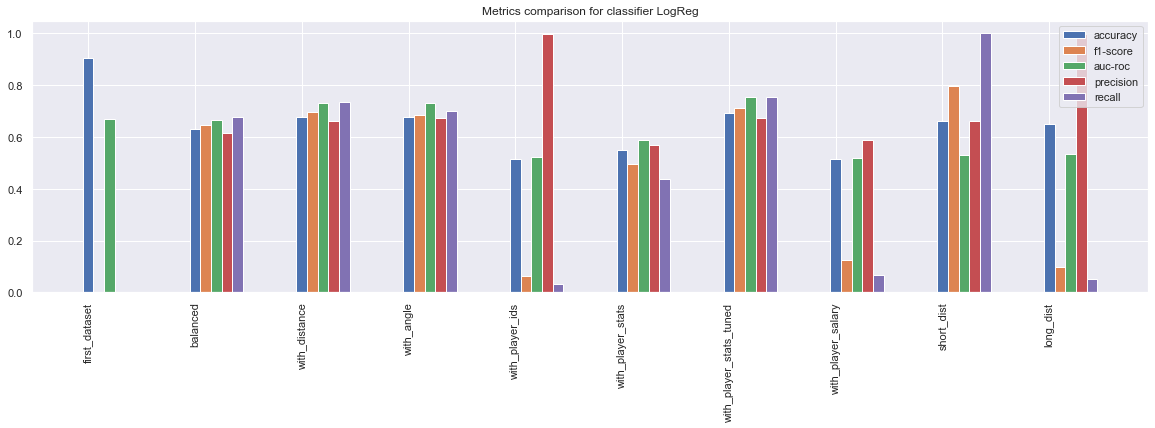

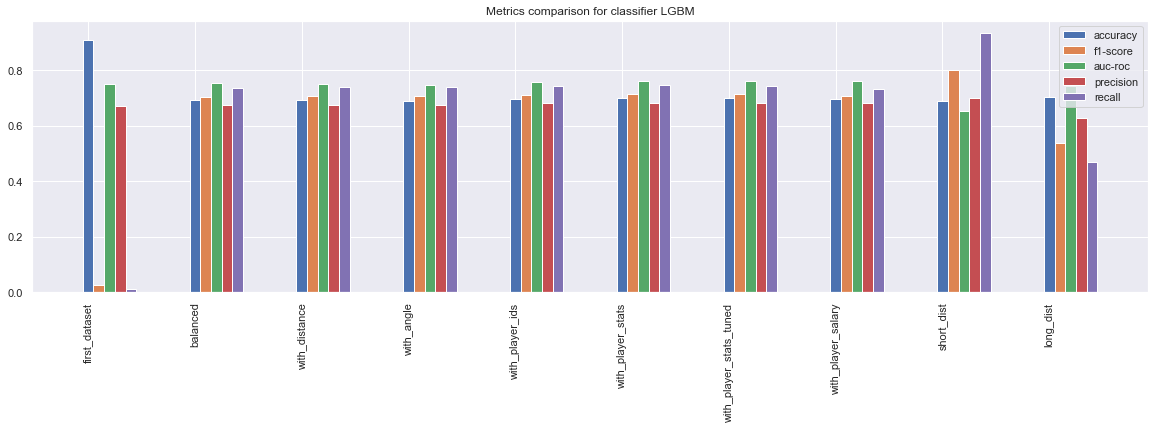

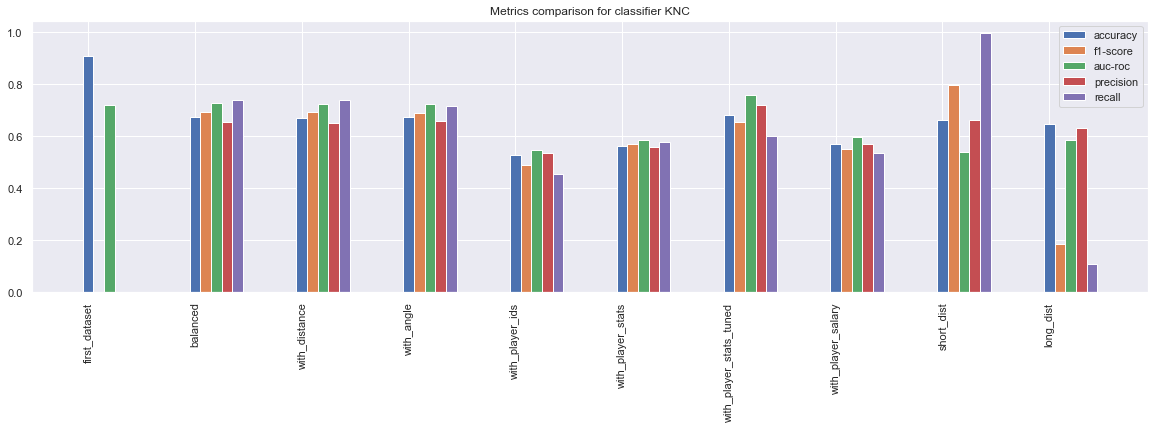

In [5]:
plot_classifier(df, 'LogReg');
plot_classifier(df, 'LGBM');
plot_classifier(df, 'KNC');


---
### Plot metrics per metric for all classifier

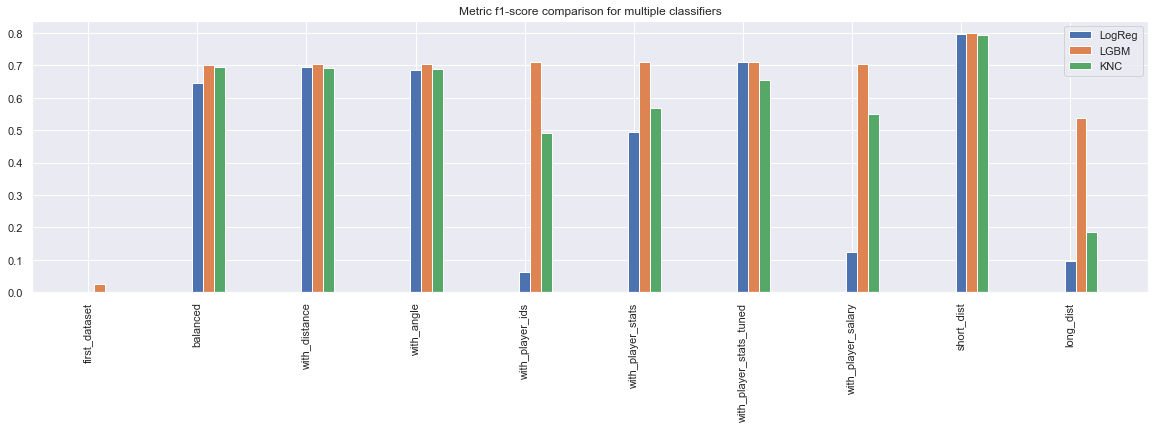

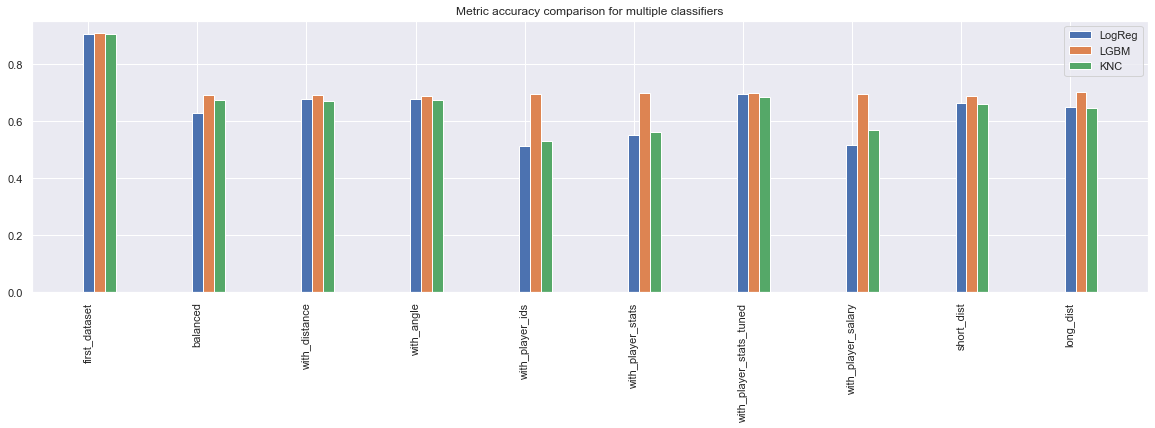

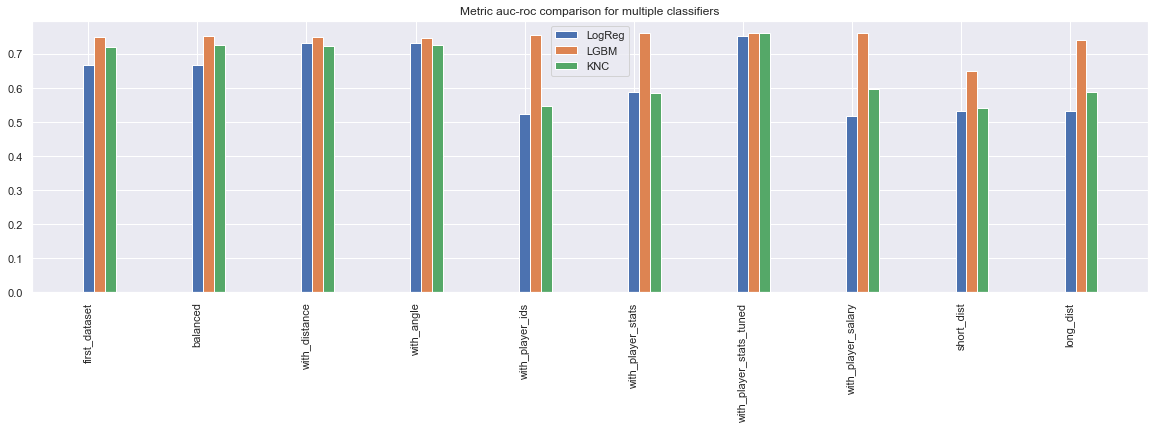

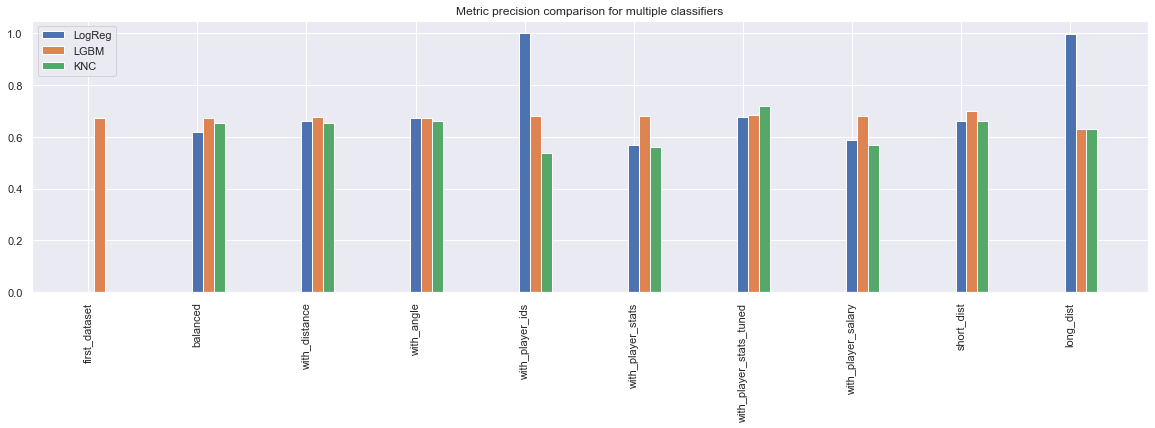

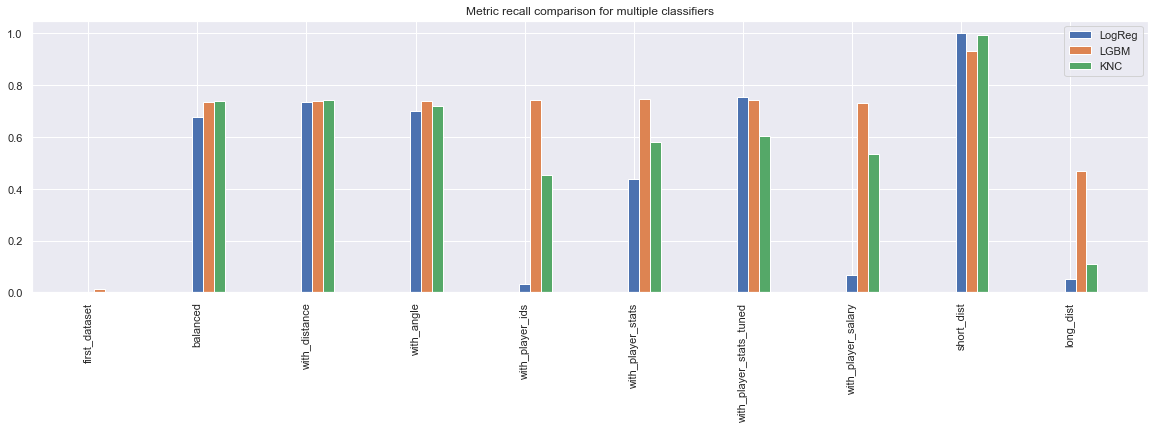

In [6]:
plot_metric(df, ['LogReg', 'LGBM', 'KNC'], 'f1-score');
plot_metric(df, ['LogReg', 'LGBM', 'KNC'], 'accuracy');
plot_metric(df, ['LogReg', 'LGBM', 'KNC'], 'auc-roc');
plot_metric(df, ['LogReg', 'LGBM', 'KNC'], 'precision');
plot_metric(df, ['LogReg', 'LGBM', 'KNC'], 'recall');